**Content**

Part 1: Pre-Analysis

Part 2: Descriptive Analysis

Part 3: Model Selection
- [Additional] Predictive Models for Spending Scores
- [Additional] Clustering Models for Customer Segmentation
- Classification Models for Customer Segmentation Prediction

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, cross_val_predict

# Part 1: Pre-Analysis

In [109]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [110]:
# basic information about the datasets
print("---TRAIN DATASET INFO---")
print(train_data.info())
print("\n---TEST DATASET INFO---")
print(test_data.info())

---TRAIN DATASET INFO---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
None

---TEST DATASET INFO---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -

In [111]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Duplicates

In [112]:
# show number of duplicates
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


### Missing Values

In [113]:
train_data.dropna(axis=0, how='any', subset=None, inplace=True)
test_data.dropna(axis=0, how='any', subset=None, inplace=True)

In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


In [115]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2154 non-null   int64  
 1   Gender           2154 non-null   object 
 2   Ever_Married     2154 non-null   object 
 3   Age              2154 non-null   int64  
 4   Graduated        2154 non-null   object 
 5   Profession       2154 non-null   object 
 6   Work_Experience  2154 non-null   float64
 7   Spending_Score   2154 non-null   object 
 8   Family_Size      2154 non-null   float64
 9   Var_1            2154 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 185.1+ KB


# Part 2: Descriptive Analysis

In [116]:
# gender data preparation
gender = train_data.groupby('Gender').count().reset_index()[['Gender','Age']]
gender.rename(columns = {'Age':'Count'}, inplace = True)
gender

,Gender,Count
0,Female,2988
1,Male,3677


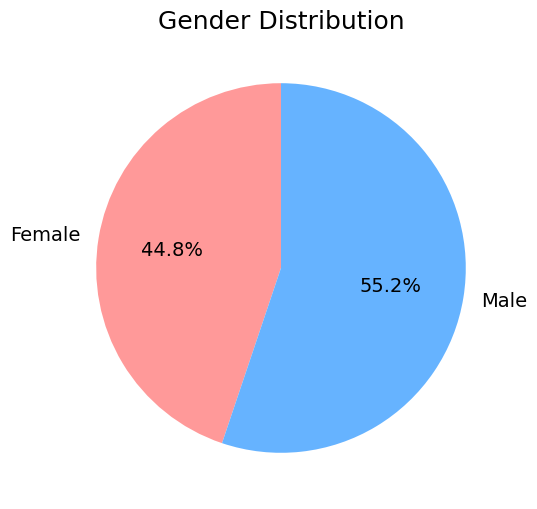

In [117]:
# gender distribution visualization
plt.figure(figsize = (6, 6))
colors = ['#ff9999','#66b3ff']
plt.pie(gender['Count'], labels = gender['Gender'], autopct = '%1.1f%%', startangle = 90, colors = colors, textprops = {'fontsize': 14})
plt.title('Gender Distribution', fontsize = 18)

plt.show()

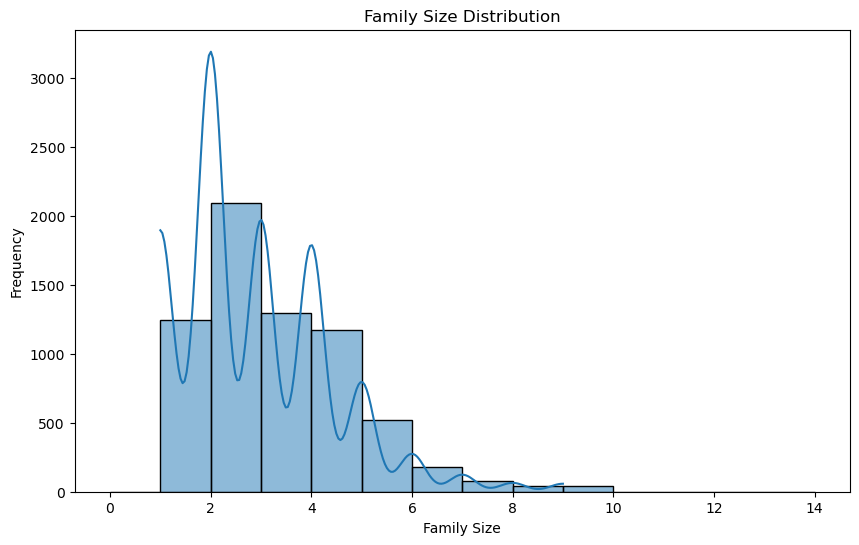

In [118]:
# family size distribution
plt.figure(figsize = (10, 6))
sns.histplot(train_data['Family_Size'], bins = list(range(0,15,1)), kde=True)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

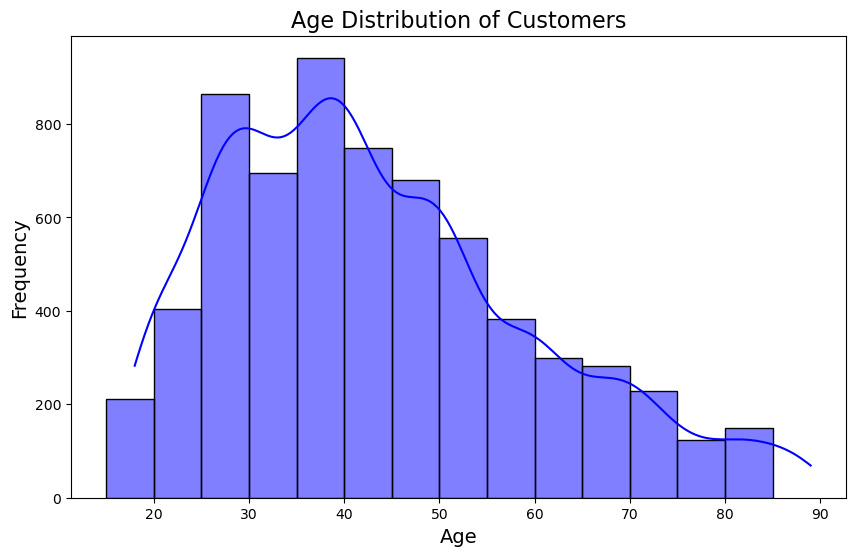

In [119]:
# age distribution
plt.figure(figsize = (10, 6))
sns.histplot(train_data['Age'], bins = list(range(15,90,5)), kde = True, color = 'blue')

plt.title('Age Distribution of Customers', fontsize = 16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

plt.show()

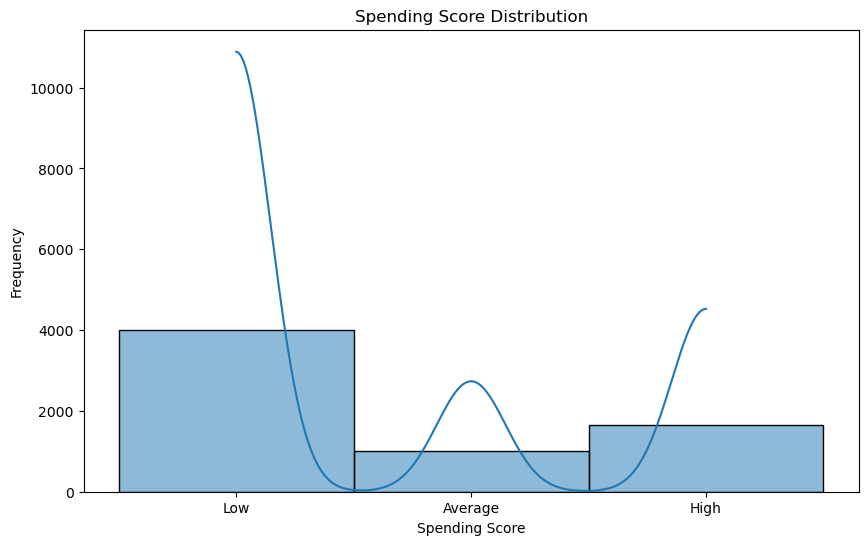

In [120]:
# spending score distribution
plt.figure(figsize = (10, 6))
sns.histplot(train_data['Spending_Score'], discrete=True, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

labels = ['Low', 'Average', 'High']
plt.xticks(ticks=[0, 1, 2], labels=labels)

plt.show()

In [121]:
# spending power data preparation, transfer spending_score into numbers
mapping = {'Low': 1, 'Average': 2, 'High': 3}
train_data['Numeric_Spending'] = train_data['Spending_Score'].map(mapping)
train_data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Numeric_Spending
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,3
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C,2
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C,1


In [122]:
# spending power by profession
Spending_bypro = train_data.groupby('Profession').sum('Numeric_Spending').reset_index().sort_values('Numeric_Spending', ascending = False)[['Profession', 'Numeric_Spending']]
Spending_bypro

,Profession,Numeric_Spending
0,Artist,3493
4,Executive,1251
5,Healthcare,1184
3,Entertainment,1148
7,Lawyer,1054
2,Engineer,860
1,Doctor,798
8,Marketing,291
6,Homemaker,256


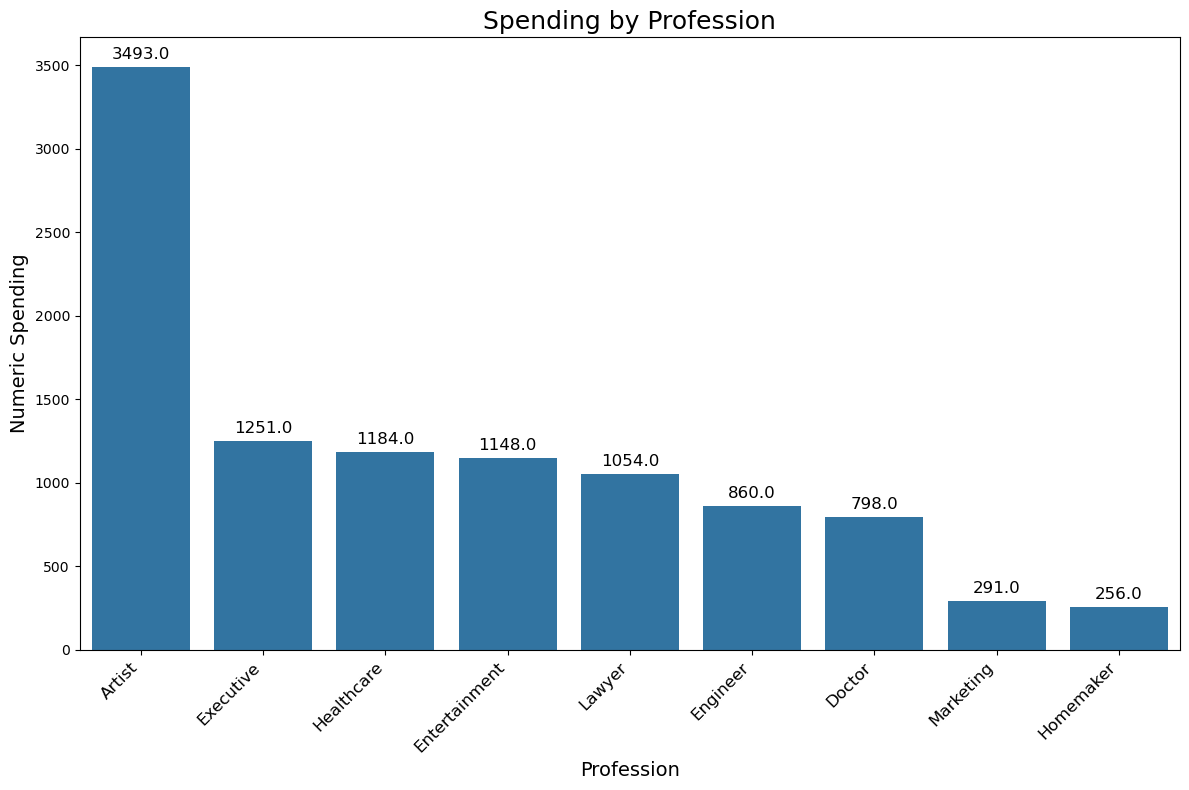

In [123]:
# spending power by profession visualization
plt.figure(figsize = (12, 8))
bar_plot = sns.barplot(x = 'Profession', y = 'Numeric_Spending', data = Spending_bypro)

plt.title('Spending by Profession', fontsize = 18)
plt.xlabel('Profession', fontsize = 14)
plt.ylabel('Numeric Spending', fontsize = 14)

plt.xticks(rotation = 45, ha='right', fontsize = 12)

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=12)

plt.tight_layout()
plt.show()

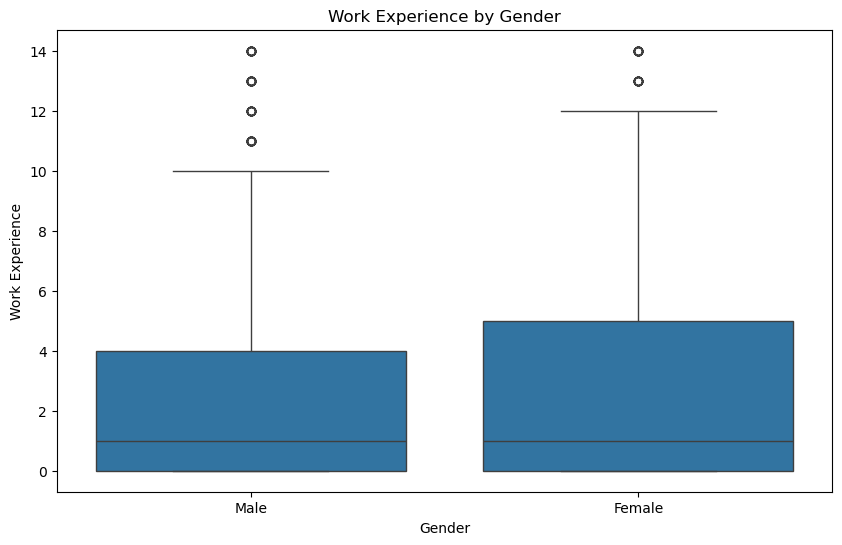

In [124]:
# work experience by gender
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Gender', y = 'Work_Experience', data = train_data)
plt.title('Work Experience by Gender')
plt.xlabel('Gender')
plt.ylabel('Work Experience')
plt.show()

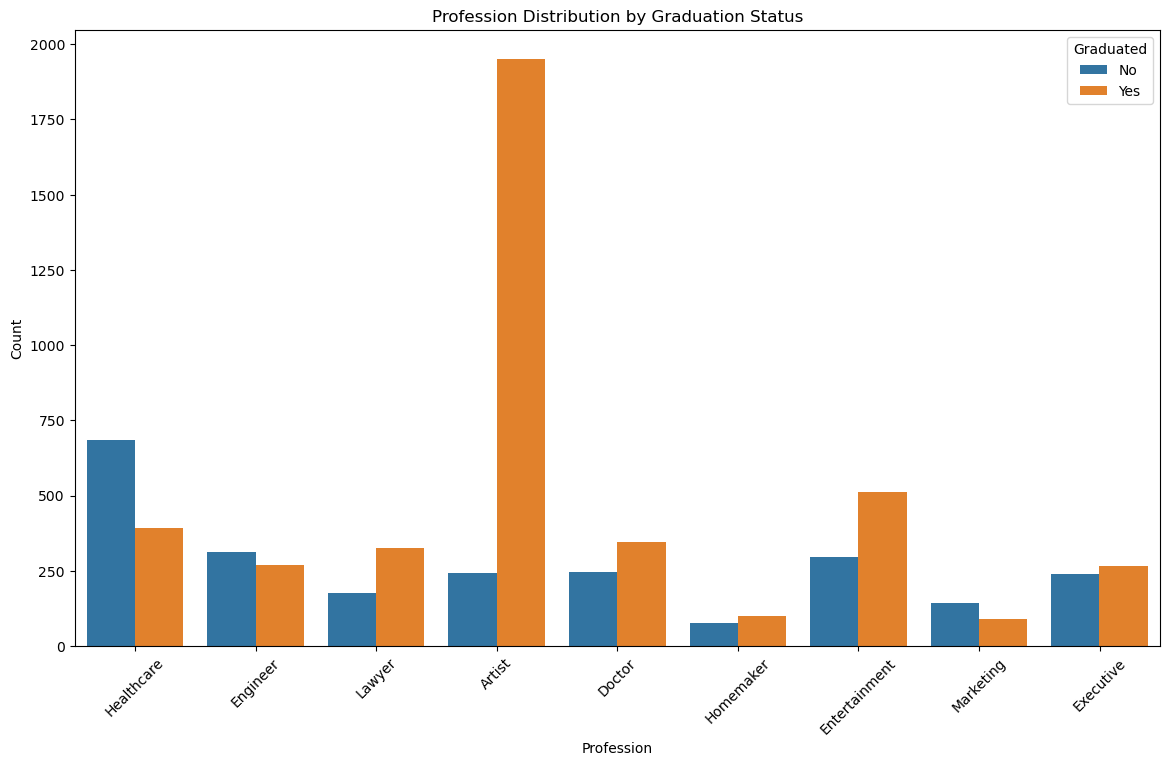

In [125]:
# graduation status by profession
plt.figure(figsize = (14, 8))
sns.countplot(x = 'Profession', hue = 'Graduated', data = train_data)
plt.title('Profession Distribution by Graduation Status')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

### Correlation Matrix

In [126]:
# Create a label encoder objects
label_encoder = LabelEncoder()

# List of Categorical values in the data
categorical_columns = [
    'Gender',
    'Ever_Married',
    'Graduated',
    'Profession',
    'Spending_Score',
    'Var_1',
    'Segmentation'
]

# Create a new dataframe to store data
numerical_train = train_data.copy().drop(columns = ['ID', 'Numeric_Spending'])

# Apply label encoding to each categorical columns
for column in categorical_columns:
    numerical_train[column] = label_encoder.fit_transform(numerical_train[column].astype(str))
    
# Check the results
numerical_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
5,1,1,56,0,0,0.0,0,2.0,5,2
6,1,0,32,1,5,1.0,2,3.0,5,2


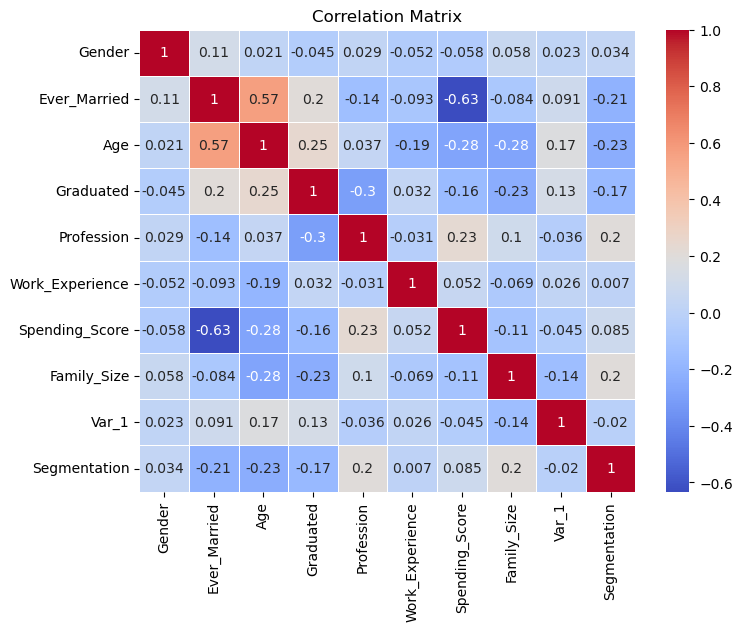

In [127]:
# correlation matrix
plt.figure(figsize = (8, 6))

corr_matrix = numerical_train.corr()

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

# Part 3: Model Selection

Throughout this part, we will be mainly focuses in these areas:
1. Predictive models for spending scores
    - Preferrably Linear Regression as we will transform Spending_Score to numerical
    - Decision Trees/Random Forest Regressor
    - Gradient Boosting Regressor
    - Support Vector Regressor
2. Clustering models for customer segmentation
    - Create new segments of customer based on K-Means Clustering
3. Classification models for customer segmentation prediction
    - Predict customer segment (A, B, C, D) for new potential customers based on features in the training data
    - Logistic Regression/Random Forest Classifier/Gradient Boosting Classifier
4. Feature importance analysis
    - Identify which features are most important in predicting the target values, like Spending_Score
    - Random Forest/Gradient Boosting

## [Additional] Predictive Models for Spending Scores

In [128]:
# Define dependent and independent variables (or features and target)
X_train = numerical_train.drop(columns = ['Spending_Score', 'Segmentation'])
Y_train = numerical_train['Spending_Score']

# Create the categorical columns for test now,
# since it does not have 'Segmentation'
categorical_columns_test = [
    'Gender',
    'Ever_Married',
    'Graduated',
    'Profession',
    'Var_1',
    'Spending_Score'
]

# Copy and paste the test_data so that it won't modify the original data
numerical_test = test_data.copy().drop(columns=['ID'])

# Label Encodering
for column in categorical_columns_test:
    numerical_test[column] = label_encoder.fit_transform(numerical_test[column].astype(str))

# Define dep and indep vars again
X_test = numerical_test.drop(columns = ['Spending_Score'])
Y_test = numerical_test['Spending_Score']

### Linear Regression

In [129]:
# Start and train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
print(f'Linear Regression MSE: {mse_lr:.4f}')

Linear Regression MSE: 0.4066


### Decision Tree Regressor

In [130]:
# Start and train the Decision Tree Regressor Model
dt_model = DecisionTreeRegressor(random_state = 208)
dt_model.fit(X_train, Y_train)

# Make predictions
Y_pred_dt = dt_model.predict(X_test)

# Evaluate model
mse_dt = mean_squared_error(Y_test, Y_pred_dt)
print(f'Decision Tree Regressor MSE: {mse_dt:.4f}')

Decision Tree Regressor MSE: 0.4777


### Random Forest Regressor

In [131]:
# Start and train
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 208)
rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print(f'Random Forest Regressor MSE: {mse_rf:.4f}')

Random Forest Regressor MSE: 0.2810


### Gradient Boosting Regressor

In [132]:
# Start and train
gbm_model = GradientBoostingRegressor(n_estimators = 100, random_state = 208)
gbm_model.fit(X_train, Y_train)

# Make predictions
Y_pred_gbm = gbm_model.predict(X_test)

# Evaluate Model
mse_gbm = mean_squared_error(Y_test, Y_pred_gbm)
print(f'Gradient Boosting Regressor MSE: {mse_gbm:.4f}')

Gradient Boosting Regressor MSE: 0.2991


### Support Vector Regressor

In [133]:
# Start and train
svr_model = SVR()
svr_model.fit(X_train, Y_train)

# Make predictions
Y_pred_svr = svr_model.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(Y_test, Y_pred_svr)
print(f'Support Vector Regressor MSE: {mse_svr:.4f}')

Support Vector Regressor MSE: 0.4090


In [134]:
# # Standardize the data before implementing SVR improvements
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# # Define parameter grids for GridSearchCV
# param_grid = {
#     'kernel' : ['linear', 'poly', 'rbf'],
#     'C' : [0.1, 1, 10],
#     'epsilon' : [0.01, 0.1, 1]
# }

In [135]:
# # GridSearchCV
# svr = SVR()
# grid_search = GridSearchCV(svr, param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)
# grid_search.fit(X_train_scaled, Y_train)

# # Get the model from gridsearchcv
# best_svr = grid_search.best_estimator_

# # Make predictions
# Y_pred_svr_scaled = best_svr.predict(X_test_scaled)

# # Evaluate models
# mse_svr_scaled = mean_squared_error(Y_test, Y_pred_svr_scaled)
# print(f'Scaled Support Vector Regressor MSE: {mse_svr_scaled:.4f}')

### Predictive Modeling Summary

In [136]:
# Create Model Performance
mse_performance_summary = {
    'Model': [
        'Linear Regression',
        'Decision Tree Regressor',
        'Random Forest Regressor',
        'Gradient Boosting Regressor',
        'Scaled Support Vector Regressor'
    ],
    'MSE': [
        mse_lr,
        mse_dt,
        mse_rf,
        mse_gbm,
        mse_svr
    ]
}

performance_df = pd.DataFrame(mse_performance_summary)
performance_df

,Model,MSE
0,Linear Regression,0.406581
1,Decision Tree Regressor,0.477720
2,Random Forest Regressor,0.281009
3,Gradient Boosting Regressor,0.299109
4,Scaled Support Vector Regressor,0.408960


### Feature Importance Analysis

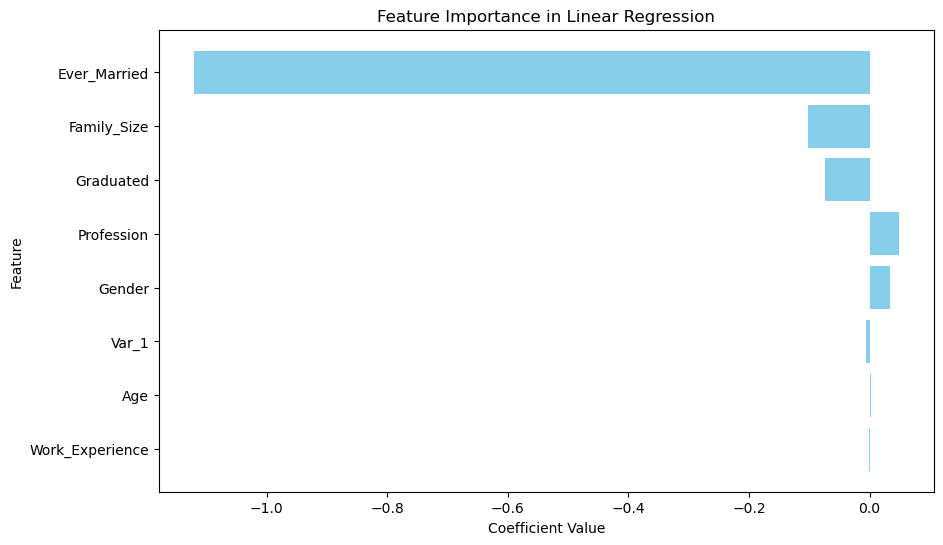

In [ ]:
# For linear regression
feature_names = X_train.columns

coefficients = lr_model.coef_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()

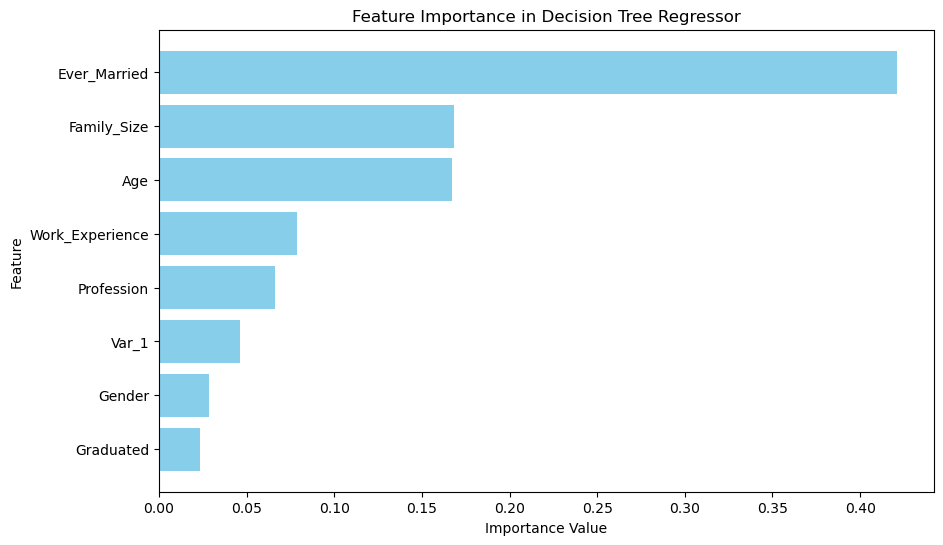

In [ ]:
# For Decision Tree Regressor
feature_names = X_train.columns

importances = dt_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Regressor')
plt.gca().invert_yaxis()
plt.show()

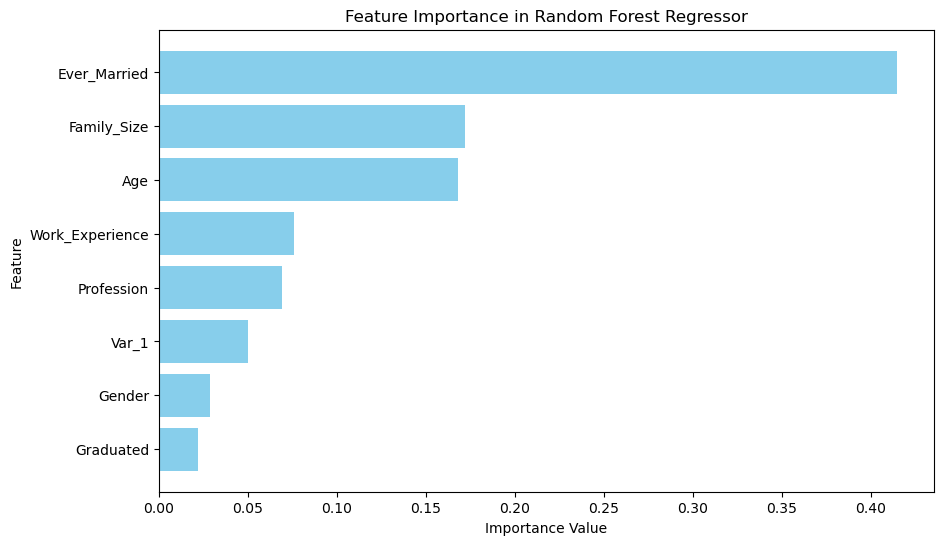

In [ ]:
# For Random Forest Regressor
feature_names = X_train.columns

importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()

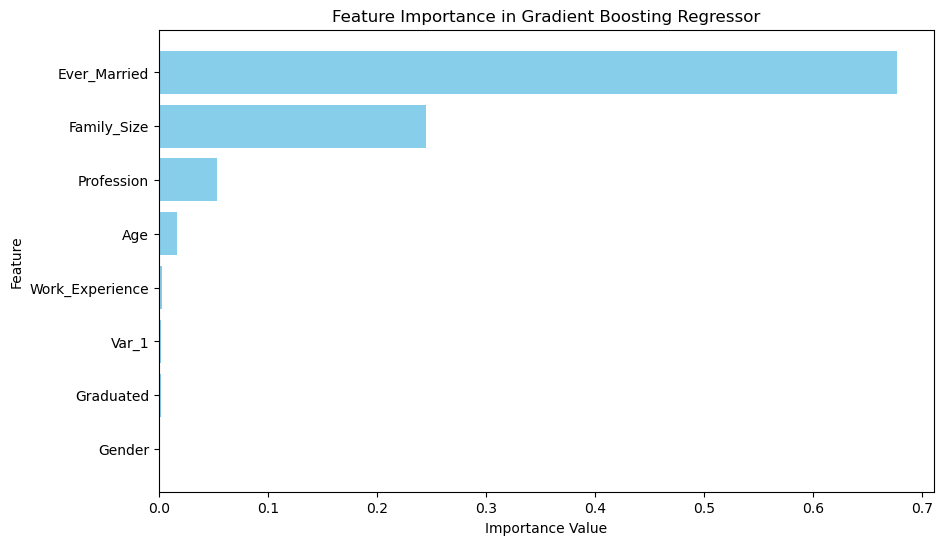

In [ ]:
# For Gradient Boosting Regressor
feature_names = X_train.columns

importances = gbm_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

## [Additional] Clustering Models for Customer Segmentation

**Objective:** Create new segments of customer based on clustering to understand different customer groups. 

**Approach:** Use clustering techniques to identify distinct customer segment.

Before doing clustering modeling, we need to standardize our whole dataset before using clustering methods like KMeans.

In [137]:
# First, we need to standardize features
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(numerical_train) # since we dont need to use 'ID' column

# Second, find out optimal # of k using elbow method
wcss = [] # within-cluster sum of square for elbow method
for i in range(1, 11): # use 10
    kmeans = KMeans(
        n_clusters = i,
        init = 'k-means++',
        max_iter = 300,
        n_init = 10,
        random_state = 208
    )
    kmeans.fit(scaled_train_data)
    wcss.append(kmeans.inertia_)


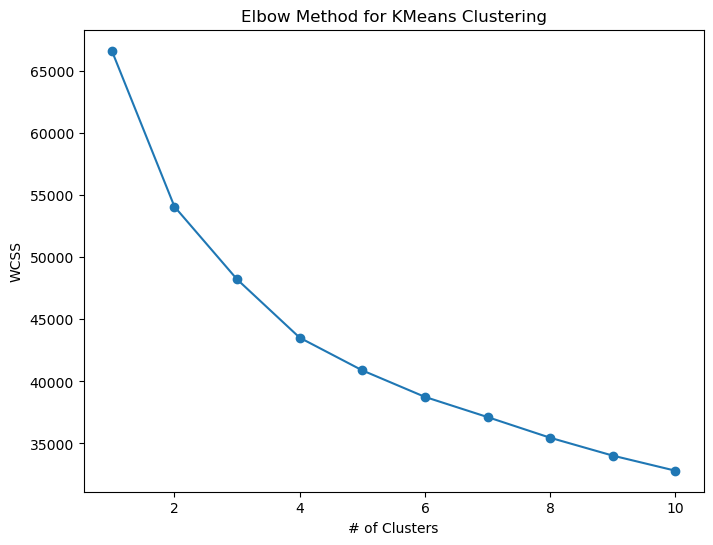

In [138]:
# Third, plot the elbow methods in graph for better visz
plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Elbow Method for KMeans Clustering')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [139]:
# Apply K-Means with the optimal number of clsuter based on graph above
kmeans = KMeans(
    n_clusters = 4,
    init = 'k-means++',
    max_iter = 300,
    n_init = 10,
    random_state = 208
)
clusters = kmeans.fit_predict(scaled_train_data)

# Add labels to the `numerical_train` dataframe
numerical_train['Cluster'] = clusters

# Analyze the clusters
cluster_analysis = numerical_train.groupby('Cluster').mean()
cluster_analysis

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Cluster,,,,,,,,,,
0,0.651813,0.963731,69.640415,0.588601,5.527461,1.225907,1.417617,2.127461,4.656995,1.315026
1,0.592205,1.000000,46.795152,0.778042,1.419677,2.536122,0.240494,3.205323,4.217681,1.432985
2,0.453704,0.417211,41.307190,0.834423,1.179194,3.308824,1.986383,1.884532,4.223312,0.783769
3,0.550568,0.081818,27.652273,0.290909,4.270455,2.800568,1.977841,3.794886,3.822159,2.590909


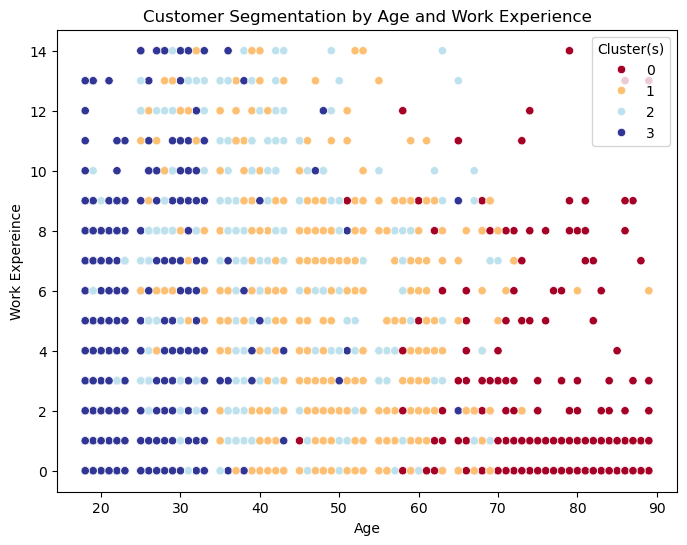

In [140]:
# Visualization of the clustering above
plt.figure(figsize = (8, 6))
sns.scatterplot(
    x = numerical_train['Age'],
    y = numerical_train['Work_Experience'],
    hue = numerical_train['Cluster'],
    palette = 'RdYlBu'
)
plt.title('Customer Segmentation by Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Expereince')
plt.legend(title = 'Cluster(s)')
plt.show()

## Classification Models for Customer Segmentation Prediction

In [141]:
# Then, seperate features from data
X_train_class = numerical_train.drop(columns = ['Segmentation', 'Cluster']) # remove cluster as we do not need it here
Y_train_class = numerical_train['Segmentation']
X_test_class = numerical_test
# Y_test_class does not exist as there is no Segmentation in test_data

In [142]:
# Logistic Regression
logreg_model = LogisticRegression(max_iter = 1000, random_state = 208)
logreg_model.fit(X_train_class, Y_train_class)

# Predict segments for the test data
test_data['LogReg_Segmentation'] = logreg_model.predict(X_test_class)

In [143]:
# Random Forest Classifer
rfc_model = RandomForestClassifier(n_estimators = 100, random_state = 208)
rfc_model.fit(X_train_class, Y_train_class)

# Predict segments
test_data['RFC_Segmentation'] = rfc_model.predict(X_test_class)

In [144]:
# Gradient Boosting Classifer
gbc_model = GradientBoostingClassifier(n_estimators = 100, random_state = 208)
gbc_model.fit(X_train_class, Y_train_class)

# Predict segments
test_data['GBC_Segmentation'] = gbc_model.predict(X_test_class)

In [145]:
# Display the first few rows of `test_data` with the predicted segments
print(test_data[['ID', 'LogReg_Segmentation', 'RFC_Segmentation', 'GBC_Segmentation']].head())

       ID  LogReg_Segmentation  RFC_Segmentation  GBC_Segmentation
0  458989                    0                 1                 0
1  458994                    2                 2                 1
3  459000                    0                 2                 2
5  459003                    2                 2                 1
6  459005                    2                 0                 1


In [146]:
# Decode the predicted segments back to the original labels (A, B, C, D)

# Define the labels to be mapping
label_mapping = {
    0 : 'A',
    1 : 'B',
    2 : 'C',
    3 : 'D'
}

# Mannually transform the labels to original labels
test_data['LogReg_Segmentation'] = test_data['LogReg_Segmentation'].map(label_mapping)
test_data['RFC_Segmentation'] = test_data['RFC_Segmentation'].map(label_mapping)
test_data['GBC_Segmentation'] = test_data['GBC_Segmentation'].map(label_mapping)

# Display the first 5 rows again to verify it works
print(test_data[['ID', 'LogReg_Segmentation', 'RFC_Segmentation', 'GBC_Segmentation']].head(10))

        ID LogReg_Segmentation RFC_Segmentation GBC_Segmentation
0   458989                   A                B                A
1   458994                   C                C                B
3   459000                   A                C                C
5   459003                   C                C                B
6   459005                   C                A                B
7   459008                   C                C                C
8   459013                   C                C                C
9   459014                   D                D                D
10  459015                   D                D                D
11  459016                   D                D                D


In [147]:
# Now, with the Segmentations predicted by LogReg, RFC, and GBC,
# let us do a comparison consistency of predictions
consistency_comparison = test_data[['LogReg_Segmentation', 'RFC_Segmentation', 'GBC_Segmentation']].apply(pd.Series.value_counts)
print(consistency_comparison)

   LogReg_Segmentation  RFC_Segmentation  GBC_Segmentation
A                  567               499               542
B                  203               482               429
C                  692               556               526
D                  692               617               657


Although having the results, we do not know which model we can trust than others to potentially decrease costs in developing these models when new custoemrs come in.

In [148]:
# Cross Validation Accuracy for Logistic Regression
logreg_cv_scores = cross_val_score(logreg_model, X_train_class, Y_train_class, cv = 5, scoring = 'accuracy')
Y_train_logreg_pred = cross_val_predict(logreg_model, X_train_class, Y_train_class, cv = 5)

print("Logistic Regression Classification Report:")
print(classification_report(Y_train_class, Y_train_logreg_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(Y_train_class, Y_train_logreg_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.44      0.43      1616
           1       0.35      0.14      0.20      1572
           2       0.50      0.63      0.56      1720
           3       0.61      0.73      0.67      1757

    accuracy                           0.50      6665
   macro avg       0.47      0.49      0.46      6665
weighted avg       0.47      0.50      0.47      6665

Logistic Regression Confusion Matrix:
[[ 717  172  348  379]
 [ 487  222  656  207]
 [ 234  166 1092  228]
 [ 304   69  100 1284]]


In [149]:
# Cross Validation for Random Forest Classifier
rfc_cv_scores = cross_val_score(rfc_model, X_train_class, Y_train_class, cv = 5, scoring = 'accuracy')
Y_train_rfc_pred = cross_val_predict(rfc_model, X_train_class, Y_train_class, cv = 5)

print("Random Forest Classifier Classification Report:")
print(classification_report(Y_train_class, Y_train_rfc_pred))
print("Random Forest Classifier Confusion Matrix:")
print(confusion_matrix(Y_train_class, Y_train_rfc_pred))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.42      0.42      1616
           1       0.36      0.33      0.34      1572
           2       0.53      0.52      0.52      1720
           3       0.62      0.67      0.64      1757

    accuracy                           0.49      6665
   macro avg       0.48      0.49      0.48      6665
weighted avg       0.49      0.49      0.49      6665

Random Forest Classifier Confusion Matrix:
[[ 684  381  206  345]
 [ 387  517  490  178]
 [ 216  407  898  199]
 [ 357  123  107 1170]]


In [150]:
# Cross Validation for Gradient Boosting Classifier
gbc_cv_scores = cross_val_score(gbc_model, X_train_class, Y_train_class, cv = 5, scoring = 'accuracy')
Y_train_gbc_pred = cross_val_predict(gbc_model, X_train_class, Y_train_class, cv = 5)

print("Gradient Boosting Classifier Classification Report:")
print(classification_report(Y_train_class, Y_train_gbc_pred))
print("Gradient Boosting Classifier Confusion Matrix:")
print(confusion_matrix(Y_train_class, Y_train_gbc_pred))

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      1616
           1       0.42      0.35      0.38      1572
           2       0.60      0.60      0.60      1720
           3       0.64      0.72      0.68      1757

    accuracy                           0.54      6665
   macro avg       0.53      0.53      0.53      6665
weighted avg       0.53      0.54      0.54      6665

Gradient Boosting Classifier Confusion Matrix:
[[ 752  348  195  321]
 [ 369  549  467  187]
 [ 153  315 1033  219]
 [ 340  108   40 1269]]


In [151]:
# Mean Cross-Validation Accuracy table
cv_summary_table = {
    'Logistic Regression CV:' : round(logreg_cv_scores.mean(), 4),
    'Random Forest Classifier CV:' : round(rfc_cv_scores.mean(), 4),
    'Gradient Boosting Classifier CV:' : round(gbc_cv_scores.mean(), 4)
}

# DataFrame
cv_summary_df = pd.DataFrame(cv_summary_table, index = [0])
cv_summary_df

,Logistic Regression CV:,Random Forest Classifier CV:,Gradient Boosting Classifier CV:
0,0.4974,0.4905,0.5406


The cross-validation accuracy scores for the three models indicate their performance in predicting customer segments. The Gradient Boosting Classifier achieved the highest cross-validation accuracy score of 0.534, suggesting it has the best predictive power among the three models. The Logistic Regression and Random Forest Classifier had similar but lower accuracy scores of 0.4954 and 0.4857, respectively. This implies that the Gradient Boosting Classifier is the most reliable model for predicting customer segments in this dataset, outperforming the other two models in terms of accuracy. Yet, its accuracy score is too low to say that we are confident the future customer will land in certain segments, only some-what certain.